X_train.head():
      buying  meant  doors  persons  lug_boot  safety
699        1      1      1        1         1       1
433        1      2      2        2         2       2
939        2      2      3        1         3       1
362        3      3      1        3         2       3
1584       4      1      3        1         2       1

X_test.head():
      buying  meant  doors  persons  lug_boot  safety
1708       4      3      4        2         1       2
1614       4      1      4        1         3       1
247        3      1      1        2         3       2
108        3      4      2        2         2       1
1176       2      1      4        3         1       1


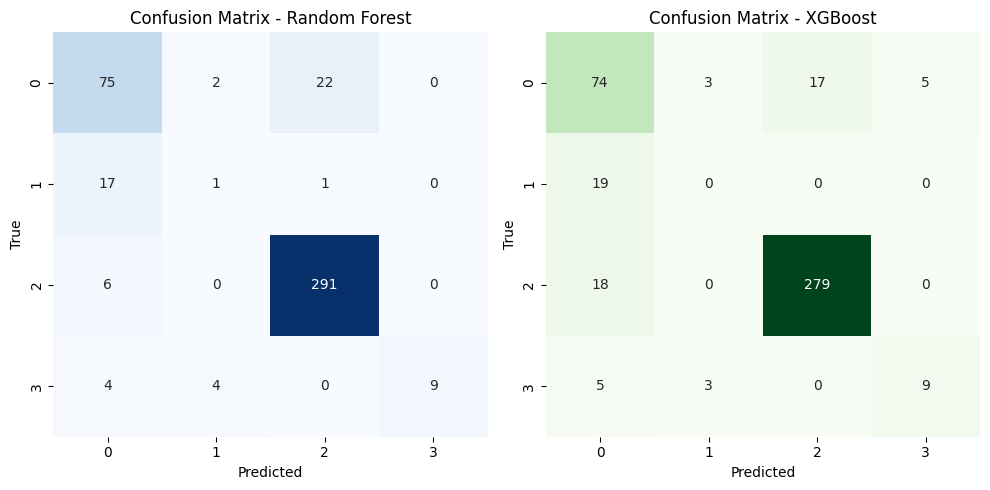


ROC AUC scores:
       Random Forest   XGBoost
unacc       0.904714  0.906734
acc         0.838247  0.810674
good        0.519052  0.492736
vgood       0.764706  0.758682


Classification report (Random Forest):
               precision    recall  f1-score   support

         acc       0.74      0.76      0.75        99
        good       0.14      0.05      0.08        19
       unacc       0.93      0.98      0.95       297
       vgood       1.00      0.53      0.69        17

    accuracy                           0.87       432
   macro avg       0.70      0.58      0.62       432
weighted avg       0.85      0.87      0.86       432


Classification report (XGBoost):
               precision    recall  f1-score   support

         acc       0.64      0.75      0.69        99
        good       0.00      0.00      0.00        19
       unacc       0.94      0.94      0.94       297
       vgood       0.64      0.53      0.58        17

    accuracy                           0.84 

In [ ]:
import pandas as pd
#!pip install category_encoders
from sklearn.model_selection import train_test_split
import category_encoders as ce
# Load dataset
df = pd.read_csv('car_evaluation.csv', header=None)

df.columns = ['buying', 'meant', 'doors', 'persons', 'lug_boot', 'safety', 'class']

X = df.drop(['class'], axis=1)
y = df['class']
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Encode
encoder = ce.OrdinalEncoder(cols=['buying', 'meant', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

print('X_train.head():', X_train.head(), sep='\n', end='\n\n')
print('X_test.head():', X_test.head(), sep='\n', end='\n')

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred[:5]

from xgboost import XGBRFClassifier
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
boosted = XGBRFClassifier()
boosted.fit(X_train, label_encoder.fit_transform(y_train))
y_pred_boosted = label_encoder.inverse_transform(boosted.predict(X_test))
y_pred_boosted[:5]

from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_boosted), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

class_labels = ['unacc', 'acc', 'good', 'vgood']

y_test_encoded = label_binarize(y_test, classes=class_labels)
y_pred_encoded = label_binarize(y_pred, classes=class_labels)
y_pred_boosted_encoded = label_binarize(y_pred_boosted, classes=class_labels)

roc_auc_scores = [roc_auc_score(y_test_encoded[:, i], y_pred_encoded[:, i]) for i in range(len(class_labels))]
roc_auc_scores_boosted = [roc_auc_score(y_test_encoded[:, i], y_pred_boosted_encoded[:, i]) for i in range(len(class_labels))]

print('\nROC AUC scores:\n', pd.DataFrame({'Random Forest':roc_auc_scores, 'XGBoost':roc_auc_scores_boosted}).set_index(pd.Index(class_labels)), sep='')

print('\n\nClassification report (Random Forest):\n', classification_report(y_test, y_pred))
print('\nClassification report (XGBoost):\n', classification_report(y_test, y_pred_boosted))